# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [28]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [29]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Another case of reviewing Brit...
1,✅ Trip Verified | On the memorable day of Janu...
2,Not Verified | I did not actually get to fly w...
3,✅ Trip Verified | We had possibly the worse ch...
4,✅ Trip Verified | I flew to LHR from ATH in C...


In [30]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [31]:
df

,reviews
0,Not Verified | Another case of reviewing Brit...
1,✅ Trip Verified | On the memorable day of Janu...
2,Not Verified | I did not actually get to fly w...
3,✅ Trip Verified | We had possibly the worse ch...
4,✅ Trip Verified | I flew to LHR from ATH in C...
...,...
995,Not Verified | Flew out of Heathrow on 22nd F...
996,✅ Trip Verified | Horrible flight BA from Gat...
997,✅ Trip Verified | New York to Venice via Lond...
998,✅ Trip Verified | Chicago to London Heathrow....


In [32]:
# Option 1 to do the cleaning 

df['reviews'] = df['reviews'].str.split('|',expand=True)[1]
display(df.head())

,reviews
0,Another case of reviewing British Airways fl...
1,"On the memorable day of January 9th, my famil..."
2,I did not actually get to fly with BA as they...
3,We had possibly the worse check-in experience...
4,I flew to LHR from ATH in Club Europe with B...


In [33]:
# Option 2 to do the cleaning 

# Remove "✅ Trip Verified" and "Not Verified" from the reviews
def clean_review_text(review):
    review = review.replace('✅ Trip Verified | ', '').replace('Not Verified | ', '')
    return review

df['reviews'] = df['reviews'].apply(clean_review_text)

# Display the cleaned reviews head to verify the changes
print('Cleaned Reviews:')
display(df.head())

Cleaned Reviews:


,reviews
0,Another case of reviewing British Airways fl...
1,"On the memorable day of January 9th, my famil..."
2,I did not actually get to fly with BA as they...
3,We had possibly the worse check-in experience...
4,I flew to LHR from ATH in Club Europe with B...


## Analyzing the review data can provide insights into customer satisfaction, common complaints, and overall sentiment towards the services provided. Here's a plan to analyze the review data:
---
Sentiment Analysis: 
Determine the overall sentiment (positive, negative, neutral) of the reviews. This can help understand the general customer sentiment towards the airline.

Keyword Extraction: 
Identify common keywords or phrases in the reviews. This can highlight frequent issues or aspects that customers particularly appreciate.

Topic Modeling: 
Use topic modeling techniques to categorize reviews into different topics. This can help identify specific areas of service that may need improvement or are doing well.

Trend Analysis: 
Analyze the reviews over time to identify any trends in customer sentiment or recurring issues.

Rating Analysis: 
If the dataset includes ratings, analyze the distribution of ratings and correlate them with the sentiment or topics identified.

**1. Apply Sentiment Analysis using TextBlob** 

We'll use the TextBlob library to analyze the sentiment of the reviews. This will give us a sentiment polarity score for each review, where a score closer to 1 indicates a positive sentiment, a score closer to -1 indicates a negative sentiment, and a score around 0 indicates a neutral sentiment.

The sentiment property returns a named-tuple of the form Sentiment(polarity, subjectivity). 
- The polarity score is a float within the range [-1.0, 1.0]. 
- The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [34]:
import pandas as pd
import re
import nltk
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

def clean(text):
    text=re.sub(r'[^\w\s]',' ',text).lower()   ### Remove punctuation by removing non-space alpha-num characters
    words=re.split(r'\W+', text)                   ### Split by remaining non-alphanumeric characters 
    non_stop_words=[word for word in words if word not in stopword]        ### Remove stopwords
    lem_words= [wn.lemmatize(word) for word in non_stop_words]             ### Clean text ==
    clean_text= ' '.join(lem_words)
    return clean_text

In [35]:
df['clean_text']=df['reviews'].apply(clean)
df

,reviews,clean_text
0,Another case of reviewing British Airways fl...,another case reviewing british airway flight ...
1,"On the memorable day of January 9th, my famil...",memorable day january 9th family embarked jou...
2,I did not actually get to fly with BA as they...,actually get fly ba cancelled flight 3 day no...
3,We had possibly the worse check-in experience...,possibly worse check experience ever ever too...
4,I flew to LHR from ATH in Club Europe with B...,flew lhr ath club europe ba641 dec 31 transfe...
...,...,...
995,Flew out of Heathrow on 22nd Feb to New York...,flew heathrow 22nd feb new york 20 min flight...
996,Horrible flight BA from Gatwick to Cape Town...,horrible flight ba gatwick cape town iberia r...
997,New York to Venice via London. Staff have be...,new york venice via london staff nice around ...
998,Chicago to London Heathrow. Club Class on Br...,chicago london heathrow club class british ai...


In [36]:
#!pip install textblob
from textblob import TextBlob 
#https://textblob.readthedocs.io/en/dev/quickstart.html

In [37]:
def get_sentiment(text):
    blob=TextBlob(text)
    return blob.sentiment

In [38]:
df['sentiment']=df['clean_text'].apply(get_sentiment)
df

,reviews,clean_text,sentiment
0,Another case of reviewing British Airways fl...,another case reviewing british airway flight ...,"(0.14999999999999997, 0.20476190476190476)"
1,"On the memorable day of January 9th, my famil...",memorable day january 9th family embarked jou...,"(0.2089583333333333, 0.53)"
2,I did not actually get to fly with BA as they...,actually get fly ba cancelled flight 3 day no...,"(0.26666666666666666, 0.3333333333333333)"
3,We had possibly the worse check-in experience...,possibly worse check experience ever ever too...,"(0.04305555555555556, 0.451388888888889)"
4,I flew to LHR from ATH in Club Europe with B...,flew lhr ath club europe ba641 dec 31 transfe...,"(0.20833333333333331, 0.3683333333333333)"
...,...,...,...
995,Flew out of Heathrow on 22nd Feb to New York...,flew heathrow 22nd feb new york 20 min flight...,"(0.3840909090909091, 0.6386363636363637)"
996,Horrible flight BA from Gatwick to Cape Town...,horrible flight ba gatwick cape town iberia r...,"(-0.1392857142857143, 0.48392857142857143)"
997,New York to Venice via London. Staff have be...,new york venice via london staff nice around ...,"(-0.025311942959001774, 0.5927510398098633)"
998,Chicago to London Heathrow. Club Class on Br...,chicago london heathrow club class british ai...,"(-0.2546626984126984, 0.5075066137566137)"


<AxesSubplot: >

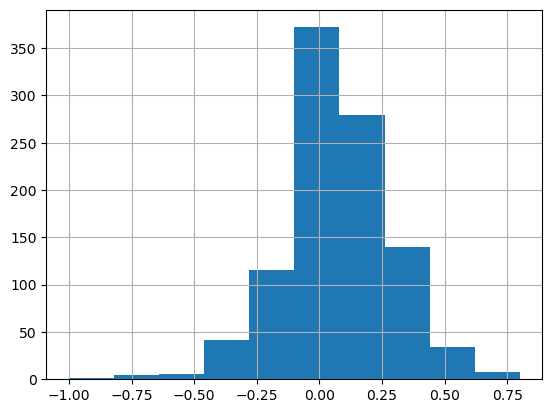

In [39]:
df[['polarity','subjectivity']]=df.sentiment.to_list()
df.polarity.hist()

In [40]:
df.sort_values(by='polarity', ascending=False)

,reviews,clean_text,sentiment,polarity,subjectivity
382,"For this 5 hour 15 min flight, you are given...",5 hour 15 min flight given bag potato chip bo...,"(0.8, 0.9)",0.800000,0.900000
828,Edinburgh to Kuala Lumpur via London. I have...,edinburgh kuala lumpur via london returned kl...,"(0.7166666666666666, 0.625)",0.716667,0.625000
750,Gatwick to St Lucia. Great service on this f...,gatwick st lucia great service flight thank m...,"(0.7, 0.675)",0.700000,0.675000
359,Good flight apart from my seat fabric was co...,good flight apart seat fabric coming apart on...,"(0.6999999999999998, 0.6000000000000001)",0.700000,0.600000
559,The crew at Denver airport is top notch! So ...,crew denver airport top notch impressed custo...,"(0.675, 0.85)",0.675000,0.850000
...,...,...,...,...,...
476,The food was awful. An over night early morn...,food awful night early morning flight started...,"(-0.6428571428571429, 0.8571428571428571)",-0.642857,0.857143
875,Stockholm to London. Worst business class fl...,stockholm london worst business class flight ...,"(-0.65, 0.7833333333333333)",-0.650000,0.783333
103,"The worst service ever, my baggage did not a...",worst service ever baggage arrive time flight...,"(-0.6999999999999998, 0.8555555555555555)",-0.700000,0.855556
867,Mykonos to London flight delayed and waiting...,mykonos london flight delayed waiting depart ...,"(-0.7666666666666666, 0.8666666666666667)",-0.766667,0.866667


In [19]:
! pip install tqdm
from textblob import TextBlob
from tqdm import tqdm  
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
import re

**2. Apply Aspect based Sentiment Analysis**

In [20]:
# Ensure that the necessary NLTK corpora are downloaded
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to clean and tokenize text
stop_words = set(stopwords.words('english'))
def clean_and_tokenize(text):
    # Remove non-alphabetic characters and lowercase the text
    words = re.sub('[^a-zA-Z]', ' ', text).lower().split()
    # Remove stopwords
    words = [w for w in words if w not in stop_words]
    return words

# Function to identify aspects based on frequency
def identify_aspects(reviews):
    # Tokenize and clean the review text
    tokens = reviews.apply(clean_and_tokenize).explode()
    # Count the frequency of each word
    frequency = Counter(tokens)
    # Return the most common words as aspects
    return frequency.most_common(10)

# Identify aspects
aspects = identify_aspects(df['reviews'])
print('Identified aspects:', aspects)

# Function to analyze sentiment for each aspect
def aspect_sentiment(reviews, aspect):
    aspect_sentiments = []
    for review in tqdm(reviews, desc='Analyzing sentiment for ' + aspect):
        if aspect in review.lower():
            # Get the sentiment score
            sentiment_score = sia.polarity_scores(review)['compound']
            aspect_sentiments.append(sentiment_score)
    # Calculate average sentiment for the aspect
    average_sentiment = sum(aspect_sentiments) / len(aspect_sentiments) if aspect_sentiments else 0
    return average_sentiment

# Analyze sentiment for each identified aspect
aspect_sentiment_scores = {}
for aspect, _ in aspects:
    aspect_sentiment_scores[aspect] = aspect_sentiment(df['reviews'], aspect)

print('Aspect sentiment scores:', aspect_sentiment_scores)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Identified aspects: [('flight', 1919), ('ba', 1278), ('service', 736), ('london', 546), ('time', 519), ('seat', 456), ('food', 448), ('class', 445), ('crew', 440), ('british', 439)]


Analyzing sentiment for british: 100%|████████████████████████████████████████████| 1000/1000 [00:01<00:00, 886.97it/s]

Aspect sentiment scores: {'flight': 0.033775365853658576, 'ba': 0.006964918851435774, 'service': 0.08047454175152748, 'london': 0.03123404761904767, 'time': 0.09858652968036531, 'seat': 0.13271621621621607, 'food': 0.22649670658682636, 'class': 0.01576320000000001, 'crew': 0.3828061290322581, 'british': -0.0873618055555555}


In [21]:
aspects

[('flight', 1919),
 ('ba', 1278),
 ('service', 736),
 ('london', 546),
 ('time', 519),
 ('seat', 456),
 ('food', 448),
 ('class', 445),
 ('crew', 440),
 ('british', 439)]

In [22]:
aspect_sentiment_scores

{'flight': 0.033775365853658576,
 'ba': 0.006964918851435774,
 'service': 0.08047454175152748,
 'london': 0.03123404761904767,
 'time': 0.09858652968036531,
 'seat': 0.13271621621621607,
 'food': 0.22649670658682636,
 'class': 0.01576320000000001,
 'crew': 0.3828061290322581,
 'british': -0.0873618055555555}

In [ ]:
! pip install transformers
! pip install torch

**3. Apply Aspect based Sentiment Analysis using BERT**

In [23]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Function to analyze sentiment using BERT
def bert_sentiment(text):
    # Tokenize input text and convert to tensor
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    # Perform inference
    outputs = model(**inputs)
    # Get the predicted logits
    logits = outputs.logits
    # Apply softmax to get probabilities
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    # Get the predicted sentiment label (positive, neutral, or negative)
    _, predicted_label = torch.max(probabilities, 1)
    return predicted_label.item()

# Function to analyze sentiment for each aspect using BERT
def aspect_sentiment_bert(reviews, aspect):
    aspect_sentiments = []
    for review in reviews:
        if aspect in review.lower():
            sentiment_label = bert_sentiment(review)
            aspect_sentiments.append(sentiment_label)
    # Calculate the percentage of positive sentiment
    positive_percentage = aspect_sentiments.count(1) / len(aspect_sentiments) * 100 if aspect_sentiments else 0
    return positive_percentage

# Analyze sentiment for each identified aspect using BERT
aspect_sentiment_scores_bert = {}
for aspect, _ in aspects:
    aspect_sentiment_scores_bert[aspect] = aspect_sentiment_bert(df['reviews'], aspect)

print('Aspect sentiment scores with BERT:', aspect_sentiment_scores_bert)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Aspect sentiment scores with BERT: {'flight': 100.0, 'ba': 100.0, 'service': 100.0, 'london': 100.0, 'time': 100.0, 'seat': 100.0, 'food': 100.0, 'class': 100.0, 'crew': 100.0, 'british': 100.0}


**4. Apply Sentiment Analysis using VADER SentimentIntensityAnalyzer**

In [43]:
import nltk
nltk.download('vader_lexicon')

# Retry initializing the SentimentIntensityAnalyzer after downloading the necessary data
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np

sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score['compound']

df['sentiment'] = df['clean_text'].apply(get_vader_sentiment)

conditions = [
    (df['sentiment'] > 0.05),
    (df['sentiment'] >= -0.05) & (df['sentiment'] <= 0.05),
    (df['sentiment'] < -0.05)
]
choices = ['positive', 'neutral', 'negative']
df['sentiment_category'] = np.select(conditions, choices)

print(df.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             reviews  \
0    Another case of reviewing British Airways fl...   
1   On the memorable day of January 9th, my famil...   
2   I did not actually get to fly with BA as they...   
3   We had possibly the worse check-in experience...   
4    I flew to LHR from ATH in Club Europe with B...   

                                          clean_text  sentiment  polarity  \
0   another case reviewing british airway flight ...     0.7942  0.150000   
1   memorable day january 9th family embarked jou...     0.9916  0.208958   
2   actually get fly ba cancelled flight 3 day no...    -0.4767  0.266667   
3   possibly worse check experience ever ever too...     0.7245  0.043056   
4   flew lhr ath club europe ba641 dec 31 transfe...     0.9584  0.208333   

   subjectivity sentiment_category  
0      0.204762           positive  
1      0.530000           positive  
2      0.333333           negative  
3      0.451389           positive  
4      0.368333

This analysis provides a quantitative measure of the sentiment expressed in each review, which can be useful for understanding overall customer sentiment towards British Airways' services.

**5. Topic Modeling Analysis**

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Load the dataframe
# Assuming df is already loaded and cleaned_reviews column is available

# Vectorize the cleaned reviews
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
reviews_vectorized = vectorizer.fit_transform(df['clean_text'])

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(reviews_vectorized)

# Display the top words for each topic
words = vectorizer.get_feature_names_out()

# Store the topics and their top words in a dataframe
topics_df = pd.DataFrame()

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-10:][::-1] # Get indices of top 10 words for this topic
    top_words = [words[i] for i in top_words_idx]
    topics_df[f'Topic {topic_idx+1}'] = top_words

print(topics_df)

     Topic 1   Topic 2   Topic 3   Topic 4  Topic 5
0         ba    flight     class        ba   flight
1      staff      hour        ba    flight     seat
2     flight        ba  business    refund       ba
3    service    london      seat  customer  service
4       crew       day      food   service     time
5    luggage  customer    flight    travel     good
6     london      told      good    airway     food
7       time   british      crew   airline     crew
8  passenger    airway     cabin   british    cabin
9   heathrow   airport      club   booking  economy


**The topic modeling analysis has identified 5 distinct topics within the British Airways reviews, with the top 10 words associated with each topic displayed above. Here's a brief overview of the potential themes for each topic based on the top words:**

Topic 1: Focuses on flight experiences, including aspects like customer service and delays.

Topic 2: Relates to luggage handling, staff interactions, and airport experiences.

Topic 3: Seems to cover aspects of the flight itself, including seating and service quality.

Topic 4: May discuss different classes of service, such as business class, and the amenities offered.

Topic 5: Appears to be about the airline's service quality, including food and crew interactions.

This analysis provides insights into the main areas of discussion in the reviews, which can help British Airways identify strengths and areas for improvement in their services.

**6. Wordcloud**

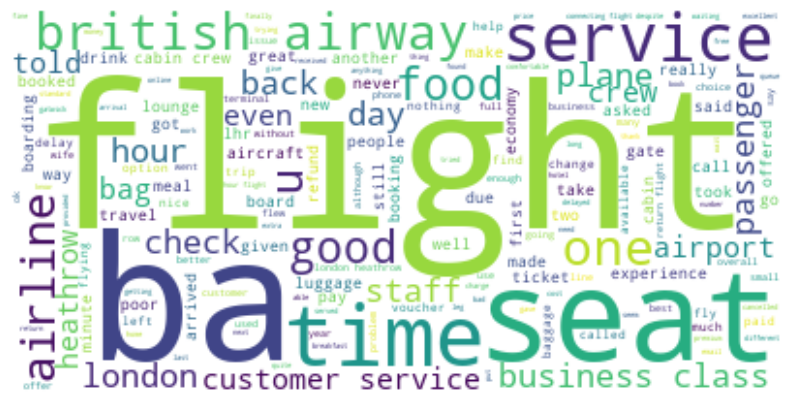

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into one large text
combined_reviews = ' '.join(df['clean_text'])

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(combined_reviews)

# Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud visually represents the most frequent words found in the British Airways reviews. Larger words indicate higher frequency, providing a quick way to identify common themes or topics mentioned by customers. This can be a useful tool for identifying areas of interest or concern in a more visual and intuitive manner.

Lets make it stremlined by using wordcloud on the sentiment we calculated

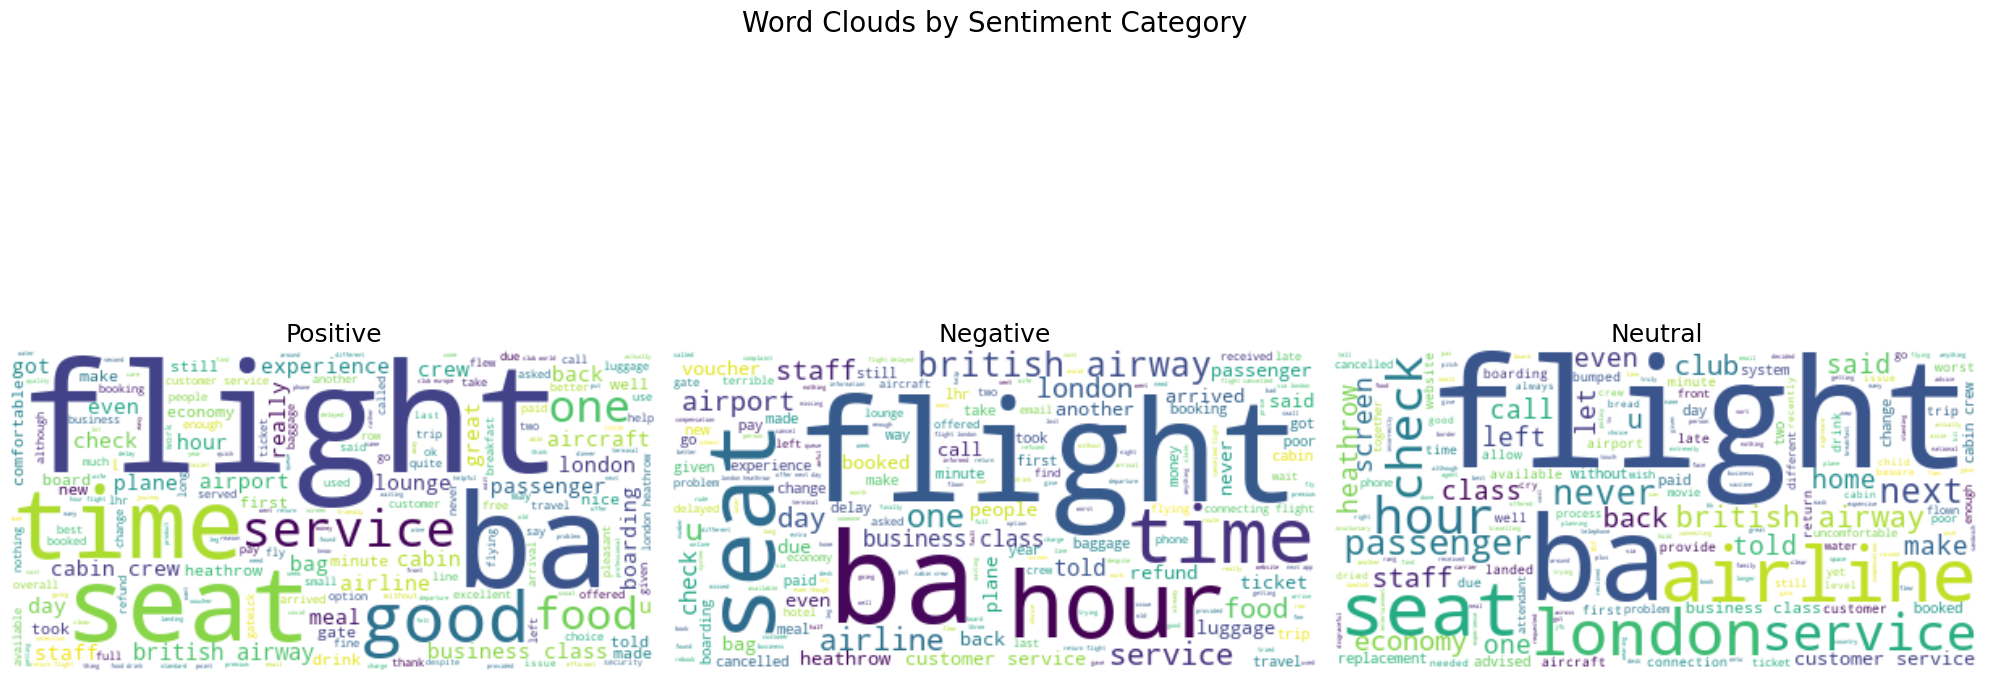

In [47]:
# Generate word clouds for each sentiment category
wordclouds = {}
for category in df['sentiment_category'].unique():
    text = ' '.join(df[df['sentiment_category'] == category]['clean_text'])
    wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(text)
    wordclouds[category] = wordcloud

# Display the generated word clouds
fig, axs = plt.subplots(1, len(wordclouds), figsize=(20, 10))
fig.suptitle('Word Clouds by Sentiment Category', fontsize=20)

for ax, (category, wordcloud) in zip(axs, wordclouds.items()):
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(category.capitalize(), fontsize=18)
    ax.axis('off')

plt.tight_layout()
plt.show()

These word clouds visually represent the most frequent words found in the British Airways reviews, categorized by sentiment (positive, neutral, negative). Each word cloud corresponds to a different sentiment category, providing insights into the common themes or topics mentioned within each sentiment group. This visualization helps in understanding the specific aspects of the service that customers feel positively, neutrally, or negatively about.

# Visualisations and Metrics

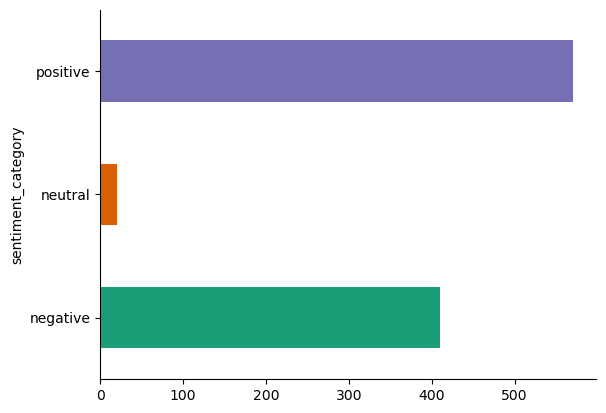

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

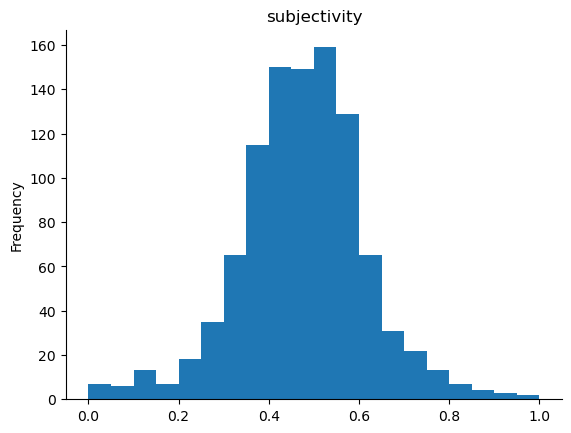

In [50]:
from matplotlib import pyplot as plt
df['subjectivity'].plot(kind='hist', bins=20, title='subjectivity')
plt.gca().spines[['top', 'right',]].set_visible(False)

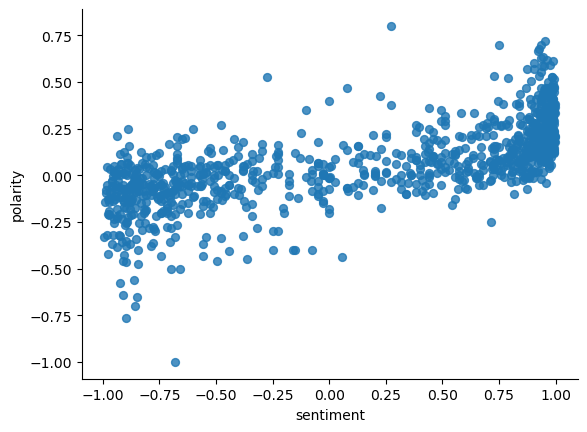

In [51]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sentiment', y='polarity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

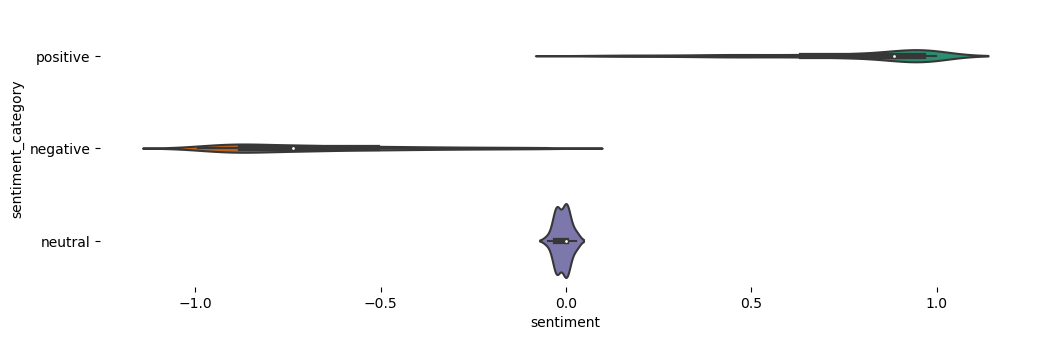

In [53]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['sentiment_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='sentiment', y='sentiment_category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

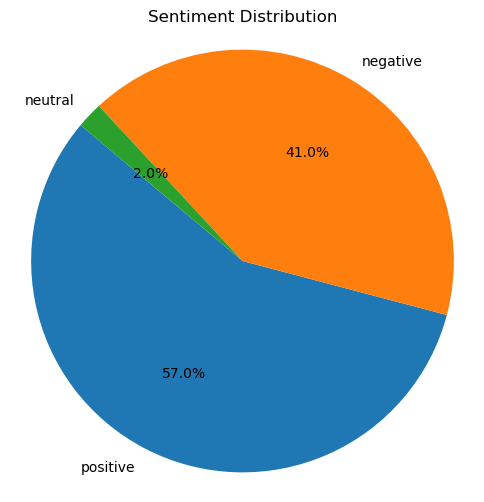

In [60]:
# Sentiment Distribution Pie Chart
sentiment_counts = df['sentiment_category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()